# Pandas: Review
## Objetivo da aula: 
- importar, analisar e tratar os 2 datasets diferentes, 
- realizar análises: groupby; pivot_table
- automatizar o processo: decoradores, pipe

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Parte 1: importar e analisar 2 datasets

## Fake datasets: Amostra de vendas de frutas para clientes
### 4000 amostras de vendas foram retiradas de supermercados famosos
- Período: mês de janeiro de 2021
- Supermercados: Broa de açúcar, Plus, Mês
### Apenas vendas de algumas frutas foram selecionadas



In [66]:
link_clientes = 'https://raw.githubusercontent.com/srgari/python/master/fake_datasets/csv/dados_clientes.csv'

link_vendas = 'https://raw.githubusercontent.com/srgari/python/master/fake_datasets/csv/venda_produtos.csv'

df_clientes = pd.read_csv(link_clientes)
df_vendas = pd.read_csv(link_vendas)

## - olhar as tabelas: qual é a chave das tabelas?

In [67]:
df_clientes.head()

,id_cliente,nome,sobrenome,sexo,cpf,grau_instrucao,uf,cep,idade,data_inscricao
0,-5271066554876290418,ALINE,BOTELHO RIGONI,F,36919884666,fundamental completo,MG,32401-614,32.027446,2021-10-04
1,-9118477834724310601,ARAO,CIQUEIRA SCARCINELLI,M,30289361869,fundamental incompleto,SP,15253-864,35.258034,2021-03-24
2,7606654413632934233,ARON,CHAGAS ZANICHELLI,M,31520745060,fundamental incompleto,RS,92776-450,41.042358,2021-05-13
3,-5173874165691032850,ADA,GRIFFO MORO,F,31564113612,ensino medio completo,MG,30201-433,24.418194,2021-05-04
4,6434582929127928684,ABADE,CONCIANI MILLER,M,36849054538,fundamental incompleto,BA,45908-655,37.185126,2021-01-25


In [68]:
df_vendas.head()

,Unnamed: 0,cpf,nome,produto,data,preco
0,32438,33266871847,Mes,uva,2021-01-05,7
1,89560,30961378891,Broa de Açúcar,banana,2021-01-20,1
2,9538,34831363804,Broa de Açúcar,pera,2021-01-09,3
3,9229,39144900805,Mes,pera,2021-01-08,3
4,71718,30808077821,Broa de Açúcar,pera,2021-01-03,3


In [69]:
set(df_vendas).intersection(set(df_clientes))

{'cpf', 'nome'}

In [70]:
display('cpf', df_clientes.cpf.head(3), 'nome', df_vendas.nome.head(3))

'cpf'

0    36919884666
1    30289361869
2    31520745060
Name: cpf, dtype: int64

'nome'

0               Mes
1    Broa de Açúcar
2    Broa de Açúcar
Name: nome, dtype: object

## - CPF: chave entre as duas tabelas. Verificar se a chave é única na tabela de clientes. Se não for, tratar a tabela

In [71]:
df_clientes.head(2)

,id_cliente,nome,sobrenome,sexo,cpf,grau_instrucao,uf,cep,idade,data_inscricao
0,-5271066554876290418,ALINE,BOTELHO RIGONI,F,36919884666,fundamental completo,MG,32401-614,32.027446,2021-10-04
1,-9118477834724310601,ARAO,CIQUEIRA SCARCINELLI,M,30289361869,fundamental incompleto,SP,15253-864,35.258034,2021-03-24


In [72]:
df_clientes['nome_completo'] = df_clientes['nome'] + ' ' + df_clientes['sobrenome']
df_clientes.head(2)

,id_cliente,nome,sobrenome,sexo,cpf,grau_instrucao,uf,cep,idade,data_inscricao,nome_completo
0,-5271066554876290418,ALINE,BOTELHO RIGONI,F,36919884666,fundamental completo,MG,32401-614,32.027446,2021-10-04,ALINE BOTELHO RIGONI
1,-9118477834724310601,ARAO,CIQUEIRA SCARCINELLI,M,30289361869,fundamental incompleto,SP,15253-864,35.258034,2021-03-24,ARAO CIQUEIRA SCARCINELLI


In [73]:
df_clientes.groupby('cpf').nome_completo.nunique().sort_values(ascending = False).head()

cpf
39741760396    2
34970395861    2
34932554117    2
34864634386    2
36277055801    2
Name: nome_completo, dtype: int64

In [74]:
df_clientes.groupby('cpf').nome_completo.nunique().sort_values(ascending = False).value_counts()

1    100683
2        52
Name: nome_completo, dtype: int64

### 52 CPFs possuem 2 nomes diferentes. O que fazer?

In [75]:
# função query: permite filtrar a tabela sem ter que ficar digitando o nome da tabela
# Valeu, Gabriel!
df.query('\
         sexo == "F" &\
         produto == "banana" & \
         nome_cliente.str.contains("^ANA") & \
         True').head()

,Unnamed: 0,cpf,nome_mercado,produto,data,preco,id_cliente,nome_cliente,sobrenome,sexo,grau_instrucao,uf,cep,idade,data_inscricao
2063,87835,37287335808,Mes,banana,2021-01-20,1,1214121121422391863,ANALINA,LAGO REINEHR,F,fundamental incompleto,SP,11689-084,36.517838,2021-01-22
2435,87835,37287335808,Broa de Açúcar,banana,2021-01-01,1,1214121121422391863,ANALINA,LAGO REINEHR,F,fundamental incompleto,SP,11689-084,36.517838,2021-01-22
2481,99799,39415052899,Broa de Açúcar,banana,2021-01-16,1,-1534882970772779296,ANALIANE,LAGE DE ALBERNAS,F,superior completo,SP,07125-990,57.379950,2021-07-18
2519,87835,37287335808,Plus,banana,2021-01-06,1,1214121121422391863,ANALINA,LAGO REINEHR,F,fundamental incompleto,SP,11689-084,36.517838,2021-01-22
2579,99799,39415052899,Mes,banana,2021-01-22,1,-1534882970772779296,ANALIANE,LAGE DE ALBERNAS,F,superior completo,SP,07125-990,57.379950,2021-07-18


In [76]:
df_clientes['cpf_duplicado'] = df_clientes.groupby('cpf')['nome_completo'].transform('nunique')
df_clientes = df_clientes.query('cpf_duplicado == 1')
df_clientes.query('cpf == 39741760396')

,id_cliente,nome,sobrenome,sexo,cpf,grau_instrucao,uf,cep,idade,data_inscricao,nome_completo,cpf_duplicado


### - Com a chave analisada, podemos juntar as tabelas. 
### - Atenção para a coluna 'nome', presente nas duas tabelas: adicionar sufixo
---

## Parte 2: Juntar os datasets

In [77]:
df = pd.merge(
    left = df_vendas,
    right = df_clientes,
    on = 'cpf',
    suffixes = ['_mercado','_cliente'],
    how = 'left'
)
display(df.shape, df.head())

(4000, 17)

,Unnamed: 0,cpf,nome_mercado,produto,data,preco,id_cliente,nome_cliente,sobrenome,sexo,grau_instrucao,uf,cep,idade,data_inscricao,nome_completo,cpf_duplicado
0,32438,33266871847,Mes,uva,2021-01-05,7,505996325069514907,GILDEONI,BOTELHO ZANONI,M,ensino medio completo,SP,09792-228,33.221151,2021-10-16,GILDEONI BOTELHO ZANONI,1
1,89560,30961378891,Broa de Açúcar,banana,2021-01-20,1,-9047670384844135633,ROGERIO,ONHAS ANTÔNIO,M,fundamental incompleto,SP,12900-758,47.761153,2021-08-16,ROGERIO ONHAS ANTÔNIO,1
2,9538,34831363804,Broa de Açúcar,pera,2021-01-09,3,-839998632756462002,DENISON,PIASSAROLLI FARDIN,M,fundamental incompleto,SP,17006-222,26.109342,2021-03-02,DENISON PIASSAROLLI FARDIN,1
3,9229,39144900805,Mes,pera,2021-01-08,3,7422746006001871332,DARCILA,LORENÇON BELLON,M,fundamental incompleto,SP,07445-195,31.861421,2021-03-18,DARCILA LORENÇON BELLON,1
4,71718,30808077821,Broa de Açúcar,pera,2021-01-03,3,2842314497003631082,ROSINELSON,CONCIANI MARANGUANHE,M,fundamental incompleto,SP,12204-463,26.548119,2021-12-10,ROSINELSON CONCIANI MARANGUANHE,1


In [78]:
# Remove this horrible Unnamed: 0
df = df[[x for x in df if 'Unnamed' not in x]]
df.head()

,cpf,nome_mercado,produto,data,preco,id_cliente,nome_cliente,sobrenome,sexo,grau_instrucao,uf,cep,idade,data_inscricao,nome_completo,cpf_duplicado
0,33266871847,Mes,uva,2021-01-05,7,505996325069514907,GILDEONI,BOTELHO ZANONI,M,ensino medio completo,SP,09792-228,33.221151,2021-10-16,GILDEONI BOTELHO ZANONI,1
1,30961378891,Broa de Açúcar,banana,2021-01-20,1,-9047670384844135633,ROGERIO,ONHAS ANTÔNIO,M,fundamental incompleto,SP,12900-758,47.761153,2021-08-16,ROGERIO ONHAS ANTÔNIO,1
2,34831363804,Broa de Açúcar,pera,2021-01-09,3,-839998632756462002,DENISON,PIASSAROLLI FARDIN,M,fundamental incompleto,SP,17006-222,26.109342,2021-03-02,DENISON PIASSAROLLI FARDIN,1
3,39144900805,Mes,pera,2021-01-08,3,7422746006001871332,DARCILA,LORENÇON BELLON,M,fundamental incompleto,SP,07445-195,31.861421,2021-03-18,DARCILA LORENÇON BELLON,1
4,30808077821,Broa de Açúcar,pera,2021-01-03,3,2842314497003631082,ROSINELSON,CONCIANI MARANGUANHE,M,fundamental incompleto,SP,12204-463,26.548119,2021-12-10,ROSINELSON CONCIANI MARANGUANHE,1


- Quais foram as frutas mais vendidas?
Quem comprou mais frutas? De qual mercado?

In [79]:
# quais são os nomes das colunas mesmo?
# vamos buscar com a função filter
df.filter(regex = 'valor|preco|nome|gen.ro|se.o|prod').head()

,nome_mercado,produto,preco,nome_cliente,sobrenome,sexo,nome_completo
0,Mes,uva,7,GILDEONI,BOTELHO ZANONI,M,GILDEONI BOTELHO ZANONI
1,Broa de Açúcar,banana,1,ROGERIO,ONHAS ANTÔNIO,M,ROGERIO ONHAS ANTÔNIO
2,Broa de Açúcar,pera,3,DENISON,PIASSAROLLI FARDIN,M,DENISON PIASSAROLLI FARDIN
3,Mes,pera,3,DARCILA,LORENÇON BELLON,M,DARCILA LORENÇON BELLON
4,Broa de Açúcar,pera,3,ROSINELSON,CONCIANI MARANGUANHE,M,ROSINELSON CONCIANI MARANGUANHE


In [80]:
df.groupby('produto')['preco'].agg(['count','sum'])

,count,sum
produto,,
banana,1287,1287
maçã,900,1800
pera,1322,3966
uva,491,3437


- Qual fruta vendeu mais? E qual fruta deu mais lucro?

In [81]:
df.groupby('nome_mercado')['preco'].agg(['sum','count'])

,sum,count
nome_mercado,,
Broa de Açúcar,3205,1180
Mes,3263,1179
Plus,4022,1641


- Quantos homens e mulheres compraram frutas por dia? semana?

In [82]:
df.filter(regex = 'data|sexo|cpf')

,cpf,data,sexo,data_inscricao,cpf_duplicado
0,33266871847,2021-01-05,M,2021-10-16,1
1,30961378891,2021-01-20,M,2021-08-16,1
2,34831363804,2021-01-09,M,2021-03-02,1
3,39144900805,2021-01-08,M,2021-03-18,1
4,30808077821,2021-01-03,M,2021-12-10,1
...,...,...,...,...,...
3995,38850436882,2021-01-19,F,2021-10-25,1
3996,33604651808,2021-01-26,F,2021-10-18,1
3997,30662744896,2021-01-31,F,2021-03-31,1
3998,36505959823,2021-01-17,F,2021-12-31,1


In [83]:
df['data'] = pd.to_datetime(df['data'])

### agrupar por data: pd.Grouper()
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases 

In [84]:
df.groupby([pd.Grouper(
    key = 'data',
    freq = 'd'
),'sexo']).cpf.count()


data        sexo
2021-01-01  F       63
            M       65
2021-01-02  F       54
            M       60
2021-01-03  F       68
                    ..
2021-01-29  M       53
2021-01-30  F       74
            M       66
2021-01-31  F       62
            M       62
Name: cpf, Length: 62, dtype: int64

<AxesSubplot:xlabel='data', ylabel='cpf'>

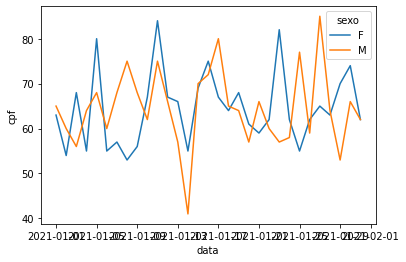

In [20]:
# Há diferença em vendas?
df_dia = df.groupby([pd.Grouper(
    key = 'data',
    freq = 'd'
),'sexo']).cpf.count().reset_index() 

sns.lineplot(
    data = df_dia,
    x = 'data',
    y = 'cpf',
    hue = 'sexo'
)

- O eixo x ficou feio... vamos arrumar: apenas o dia tá bom!

0    01
1    01
2    02
3    02
4    03
Name: data, dtype: object

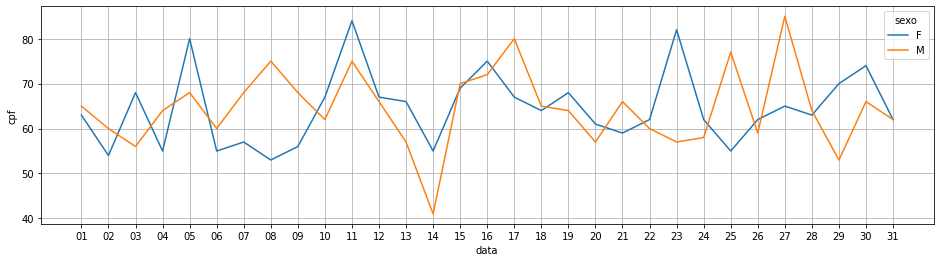

In [88]:
df_dia['data'] = df_dia['data'].dt.strftime('%d')

fig, ax = plt.subplots(figsize = [16,4])
display(df_dia['data'].head())
sns.lineplot(
    ax = ax,
    data = df_dia,
    x = 'data',
    y = 'cpf',
    hue = 'sexo',
    )
plt.grid()

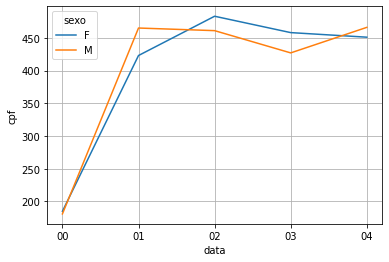

In [90]:
# Há diferença em vendas por semana?
semana = df.groupby([pd.Grouper(
    key = 'data',
    freq = 'W'
),'sexo']).cpf.count().reset_index() 
semana['data'] = semana['data'].dt.strftime('%W')

sns.lineplot(
    data = semana,
    x = 'data',
    y = 'cpf',
    hue = 'sexo'
)
plt.grid()

### Gerar tabela vendas por fruta por dia: pivot table + assign

In [92]:
(
    df.pivot_table(
        index = 'data',
        columns = 'produto',
        values = 'preco',
        aggfunc = sum)        
    .assign(vendas_dia = 
    lambda x: x.sum(axis = 1))   
).head()

produto,banana,maçã,pera,uva,vendas_dia
data,,,,,
2021-01-01,45,58,114,112,329
2021-01-02,30,46,126,133,335
2021-01-03,41,46,123,133,343
2021-01-04,43,48,108,112,311
2021-01-05,47,74,150,98,369


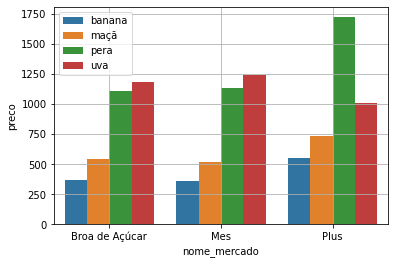

In [43]:
df_prod_mes = df.groupby(['nome_mercado','produto'])['preco'].sum().reset_index()
sns.barplot(
    data = df_prod_mes,
    x = 'nome_mercado',
    y = 'preco',
    hue = 'produto',
    estimator = sum,
    ci = None
)
plt.grid()
plt.legend()

# Parte final: automatizar a importação e tratamento dos dados

In [95]:
# Vamos reimportar os dados: começar do zero
link_clientes = 'https://raw.githubusercontent.com/srgari/python/master/fake_datasets/csv/dados_clientes.csv'

link_vendas = 'https://raw.githubusercontent.com/srgari/python/master/fake_datasets/csv/venda_produtos.csv'

df_clientes = pd.read_csv(link_clientes)
df_vendas = pd.read_csv(link_vendas)

In [113]:
# Decorador: para poder acompanhar o funcionamento da função (saborzinho extra!)
def decorador(func):
    def proxy(*args):
        print(func.__name__)        
        antes = set(args[0])
        df = func(*args)        
        depois = set(df)
        cols_novas = depois - antes
        print(f'colunas novas: \n{cols_novas}')
        print(f'linhas na tabela: {len(df)})\n')
        return df
    return proxy 

@decorador
def juntar_tabelas(clientes, vendas):    
    tabela_completa = pd.merge(
        left = clientes,
        right = vendas,
        on = 'cpf',
        suffixes = ['_cliente','_vendas'],
        how = 'right'
    ) 
    return tabela_completa

@decorador
def adicionar_nome_completo(tabela_completa):
    tabela_completa['nome_completo'] = tabela_completa['nome_cliente'] +  ' ' + tabela_completa['sobrenome']
    return tabela_completa

@decorador
def excluir_cpf_com_2_nomes(tabela_completa):
    tabela_completa['cpf_duplicado'] = tabela_completa.groupby('cpf')['nome_completo'].transform('nunique')
    tabela_completa = tabela_completa.query('cpf_duplicado == 1') 
    return tabela_completa



In [114]:
# pipe: organizar e "contar a história" do projeto
df_final = (
    df_clientes
    .pipe(juntar_tabelas, df_vendas)
    .pipe(adicionar_nome_completo)
    .pipe(excluir_cpf_com_2_nomes)
    )
display(df_final.shape, df_final).head(1)

juntar_tabelas
colunas novas: 
{'Unnamed: 0', 'preco', 'produto', 'nome_cliente', 'nome_vendas', 'data'}
linhas na tabela: 4000)

adicionar_nome_completo
colunas novas: 
{'nome_completo'}
linhas na tabela: 4000)

excluir_cpf_com_2_nomes
colunas novas: 
{'cpf_duplicado'}
linhas na tabela: 4000)



(4000, 17)

,id_cliente,nome_cliente,sobrenome,sexo,cpf,grau_instrucao,uf,cep,idade,data_inscricao,Unnamed: 0,nome_vendas,produto,data,preco,nome_completo,cpf_duplicado
0,505996325069514907,GILDEONI,BOTELHO ZANONI,M,33266871847,ensino medio completo,SP,09792-228,33.221151,2021-10-16,32438,Mes,uva,2021-01-05,7,GILDEONI BOTELHO ZANONI,1
1,-9047670384844135633,ROGERIO,ONHAS ANTÔNIO,M,30961378891,fundamental incompleto,SP,12900-758,47.761153,2021-08-16,89560,Broa de Açúcar,banana,2021-01-20,1,ROGERIO ONHAS ANTÔNIO,1
2,-839998632756462002,DENISON,PIASSAROLLI FARDIN,M,34831363804,fundamental incompleto,SP,17006-222,26.109342,2021-03-02,9538,Broa de Açúcar,pera,2021-01-09,3,DENISON PIASSAROLLI FARDIN,1
3,7422746006001871332,DARCILA,LORENÇON BELLON,M,39144900805,fundamental incompleto,SP,07445-195,31.861421,2021-03-18,9229,Mes,pera,2021-01-08,3,DARCILA LORENÇON BELLON,1
4,2842314497003631082,ROSINELSON,CONCIANI MARANGUANHE,M,30808077821,fundamental incompleto,SP,12204-463,26.548119,2021-12-10,71718,Broa de Açúcar,pera,2021-01-03,3,ROSINELSON CONCIANI MARANGUANHE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-698039812778661110,WISLANE,LAGO TRISTÃO,F,38850436882,fundamental incompleto,SP,05665-397,29.207041,2021-10-25,84349,Mes,pera,2021-01-19,3,WISLANE LAGO TRISTÃO,1
3996,616215333888828140,CILCE,CHAGAS LANDEIRA,F,33604651808,sem instrucao,SP,17220-883,24.183129,2021-10-18,48933,Plus,maçã,2021-01-26,2,CILCE CHAGAS LANDEIRA,1
3997,8059344237882064813,CRARA,TAGLIAFERRO ZANDONADE,F,30662744896,fundamental incompleto,SP,06522-679,29.133912,2021-03-31,14412,Plus,banana,2021-01-31,1,CRARA TAGLIAFERRO ZANDONADE,1
3998,3698725868988070068,KAIONARA,DE MORAES LOUREIRO,F,36505959823,fundamental incompleto,SP,03222-635,21.965425,2021-12-31,47938,Plus,banana,2021-01-17,1,KAIONARA DE MORAES LOUREIRO,1


AttributeError: 'NoneType' object has no attribute 'head'